## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               

50000/50000 [==============================] - 7s 142us/step - loss: 1.4456 - accuracy: 0.5039 - val_loss: 1.5938 - val_accuracy: 0.4563
Epoch 47/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4361 - accuracy: 0.5057 - val_loss: 1.6303 - val_accuracy: 0.4553
Epoch 48/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4479 - accuracy: 0.5023 - val_loss: 1.5927 - val_accuracy: 0.4549
Epoch 49/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4438 - accuracy: 0.4994 - val_loss: 1.6905 - val_accuracy: 0.4196
Epoch 50/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4446 - accuracy: 0.5045 - val_loss: 1.6646 - val_accuracy: 0.4361
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________

50000/50000 [==============================] - 7s 131us/step - loss: 0.5999 - accuracy: 0.7856 - val_loss: 1.7487 - val_accuracy: 0.5282
Epoch 42/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.5701 - accuracy: 0.7929 - val_loss: 1.7868 - val_accuracy: 0.5013
Epoch 43/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.5717 - accuracy: 0.7938 - val_loss: 1.8170 - val_accuracy: 0.5256
Epoch 44/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.5490 - accuracy: 0.8022 - val_loss: 1.9309 - val_accuracy: 0.5167
Epoch 45/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.5420 - accuracy: 0.8061 - val_loss: 2.0218 - val_accuracy: 0.5089
Epoch 46/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.5211 - accuracy: 0.8115 - val_loss: 1.9311 - val_accuracy: 0.5194
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.5051 - accuracy: 0.8186 - val_loss:

Epoch 37/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.9340 - accuracy: 0.6674 - val_loss: 1.4151 - val_accuracy: 0.5279
Epoch 38/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.9223 - accuracy: 0.6726 - val_loss: 1.4164 - val_accuracy: 0.5233
Epoch 39/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9033 - accuracy: 0.6799 - val_loss: 1.4424 - val_accuracy: 0.5248
Epoch 40/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.8826 - accuracy: 0.6862 - val_loss: 1.4462 - val_accuracy: 0.5261
Epoch 41/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.8659 - accuracy: 0.6909 - val_loss: 1.4677 - val_accuracy: 0.5267
Epoch 42/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.8583 - accuracy: 0.6951 - val_loss: 1.5260 - val_accuracy: 0.5166
Epoch 43/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.8402 - accuracy: 0.7009

50000/50000 [==============================] - 6s 125us/step - loss: 1.6306 - accuracy: 0.4270 - val_loss: 1.6289 - val_accuracy: 0.4240
Epoch 33/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6219 - accuracy: 0.4295 - val_loss: 1.6232 - val_accuracy: 0.4256
Epoch 34/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6153 - accuracy: 0.4313 - val_loss: 1.6172 - val_accuracy: 0.4300
Epoch 35/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6081 - accuracy: 0.4334 - val_loss: 1.6102 - val_accuracy: 0.4348
Epoch 36/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6010 - accuracy: 0.4376 - val_loss: 1.6048 - val_accuracy: 0.4312
Epoch 37/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5940 - accuracy: 0.4391 - val_loss: 1.5985 - val_accuracy: 0.4321
Epoch 38/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5877 - accuracy: 0.4393 - val_loss:

Epoch 28/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.2167 - accuracy: 0.1776 - val_loss: 2.2153 - val_accuracy: 0.1782
Epoch 29/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.2139 - accuracy: 0.1791 - val_loss: 2.2125 - val_accuracy: 0.1796
Epoch 30/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.2111 - accuracy: 0.1813 - val_loss: 2.2096 - val_accuracy: 0.1813
Epoch 31/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.2082 - accuracy: 0.1829 - val_loss: 2.2068 - val_accuracy: 0.1821
Epoch 32/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.2053 - accuracy: 0.1849 - val_loss: 2.2039 - val_accuracy: 0.1839
Epoch 33/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.2024 - accuracy: 0.1870 - val_loss: 2.2010 - val_accuracy: 0.1850
Epoch 34/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.1995 - accuracy: 0.1881

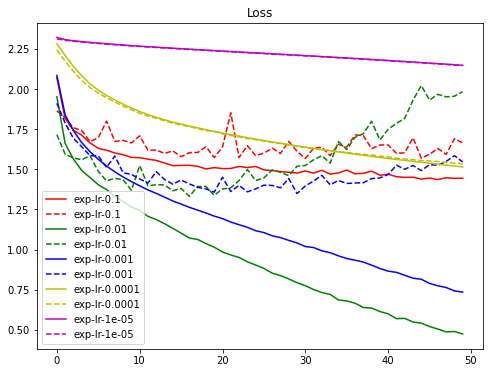

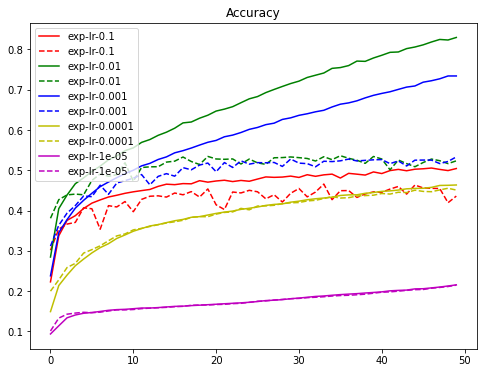

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()